In [7]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

In [51]:
# Initial parameters
mu = 13
variance = 3
T = 300
phi = 0.1

In [15]:
def simulate_ar_process(mu: float, variance: float, phi: float, T: int) -> list:
    current_val = mu
    observations = []
    observations.append(current_val)

    for _ in range(1, T):
        noise = norm.rvs(0, variance)
        current_val = mu + phi * (current_val - mu) + noise 
        observations.append(current_val)

    return observations

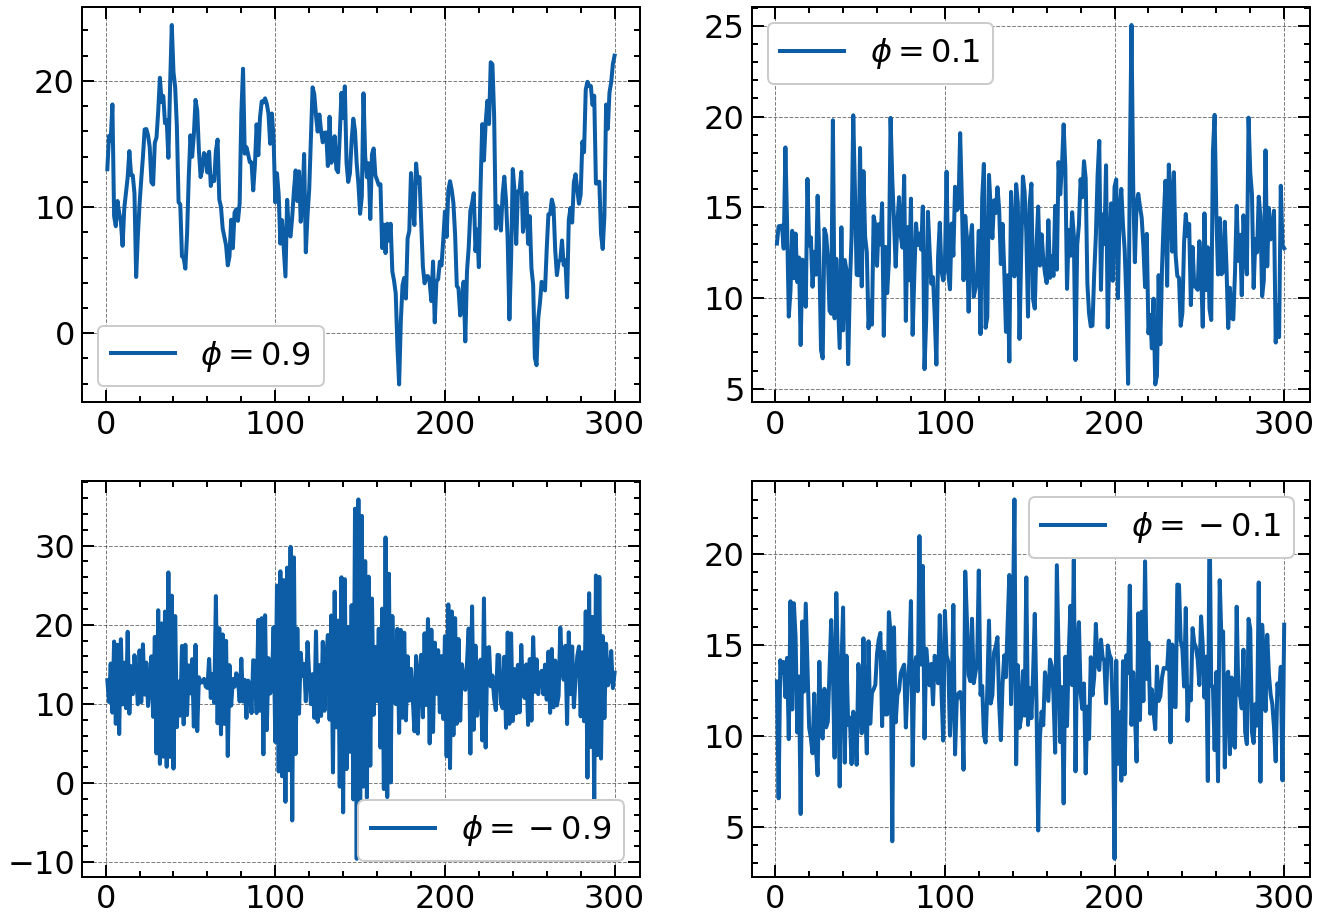

In [49]:
t = range(1, T+1)
observations1 = simulate_ar_process(mu, variance, 0.9, T)
observations2 = simulate_ar_process(mu, variance, 0.1, T)
observations3 = simulate_ar_process(mu, variance, -0.1, T)
observations4 = simulate_ar_process(mu, variance, -0.9, T)


fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(t, observations1, label='$\phi = 0.9$')
axs[0, 0].legend()
axs[0, 1].plot(t, observations2, label='$\phi = 0.1$')
axs[0, 1].legend()

axs[1, 0].plot(t, observations4, label='$\phi = -0.9$')
axs[1, 0].legend()
axs[1, 1].plot(t, observations3, label='$\phi = -0.1$')
axs[1, 1].legend()

fig.set_size_inches(11, 8)
plt.show()

In [50]:
synthetic_data_x = simulate_ar_process(mu, variance, 0.2, T)
synthetic_data_y = simulate_ar_process(mu, variance, 0.95, T)

Treating the parameters $\mu$, $\sigma^2$ and $\phi$ as random variables with prior distributions, we can make use of PyStan or PyMC3 in order to do inference of the  